### Data Loading

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
data_fa = pd.read_excel("sdsu_dti.xlsx", sheet_name="FA")
data_ad= pd.read_excel("sdsu_dti.xlsx", sheet_name="AD")
data_md = pd.read_excel("sdsu_dti.xlsx", sheet_name="MD")
data_rd = pd.read_excel("sdsu_dti.xlsx", sheet_name="RD")

(data_fa.shape, data_ad.shape, data_md.shape, data_rd.shape)

((33, 51), (33, 51), (33, 51), (33, 51))

### Visualization 

**Issue** How to visualise 200 Dimensional data?
- Reduce Dimensions: Use techniques like PCA or t-SNE to reduce dimensions.
- Plot Pairs: Create scatter plots for feature pairs to spot patterns.
- Heatmap: Display correlation matrix as a heatmap.
- Parallel Coordinates: Plot multiple features on parallel axes.
- Box Plots: Show feature distributions using box plots.
- Histograms: Display frequency distribution of individual features.
- Violin Plots: Combine box plots and kernel density plots.
- Feature Importance: Use bar plots to show feature importance.
- Interactive Tools: Utilize tools like Plotly for dynamic visualizations.


In [18]:
import plotly.express as px

In [56]:
# Defining my features 



arr2 = pd.concat([data_ad , data_fa , data_md , data_rd])
X = arr2.values


### K-Means clustering


In [66]:
from sklearn.cluster import KMeans 



kmeans = KMeans (n_clusters = 5 , n_init = 3)
kmeans.fit(X)


KMeans(n_clusters=5, n_init=3)

In [67]:
#Since the Dataset is somewhat large = 33*50*4  , hence , we also tried taking results from Mini Batch K Means Clustering Algo.

from sklearn.cluster import MiniBatchKMeans 

mini_batch = MiniBatchKMeans (n_clusters = 5 , n_init = 3)

mini_batch.fit (X)

MiniBatchKMeans(n_clusters=5, n_init=3)

C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\HP\AppData\Roaming\Python\Python38\site-pac

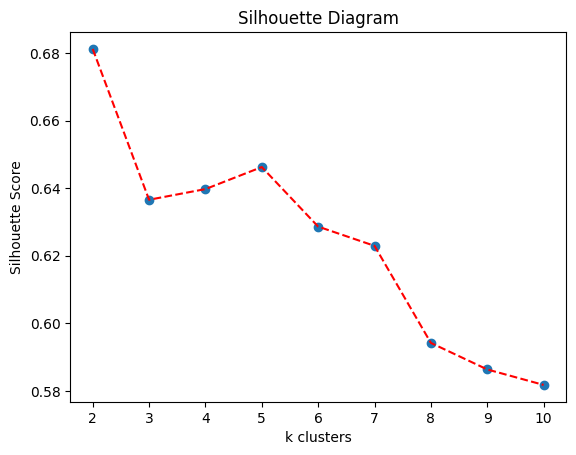

In [70]:
# Selecting the optimum number of clusters 
from sklearn.metrics import silhouette_score 

lis = []
lis_num = []

for i in range(2,11) :
    kmeans1 = KMeans(n_clusters = i)
    kmeans1.fit(X)
    lis.append(silhouette_score(X, kmeans1.labels_))
    lis_num.append(i)
    
plt.plot(lis_num ,lis , "r--")
plt.scatter(lis_num, lis)
plt.xlabel("k clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Diagram")
plt.show()

# Optimum no .of clusters , where silhouete score s maximum  , is 2 , 4 OR 5 .
    